## Quiz #0701

### "TensorFlow machine learning with Calilfornia housing data"

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')    # Turn the warnings off.

#### Answer the following question by providing Python code:

In [2]:
# Bring the data.
housing_data = fetch_california_housing()

In [3]:
# Read the description.
print(housing_data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

1). Explore the data:
- Display the dataset as a DataFrame with column labels.

In [4]:

#convert a Scikit-learn dataset to a Pandas dataset
df = pd.DataFrame(housing_data['data'])
df['target'] = housing_data['target']
df.head()

,0,1,2,3,4,5,6,7,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


2). Build a machine learning model with TensorFlow. 
- Preprocess the data if necessary.
- Build a linear regression model.
- Train the model.
- Calculate the error metrics such as MSE and RMSE (in-sample and out-of-sample). Target: RMSE < 1.

In [19]:
#preprocess the data 
df.isnull().sum()
#Build a linear regression model
warnings.filterwarnings("ignore")
tf.compat.v1.disable_eager_execution()
x = df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
y = df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
b1 = tf.Variable(1.0)                # A constant initial value.
b0 = tf.Variable(1.0)                # A constant initial value.
X_ph = tf.placeholder(tf.float32)
y_ph= tf.placeholder(tf.float32)
# Model.
# Not strictly necessary to apply the softmax activation. => in the end we will apply argmax() function to predict the label!
# y_model = tf.nn.softmax(tf.matmul(X_ph, W) + b)
# just keep the parameter inside the softmax function
y_model= X_ph*b1 + b0
loss = tf.reduce_mean(tf.square(y_ph - y_model))          # L2 loss.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
# optimizer = tf.train.MomentumOptimizer(learning_rate = 0.001, momentum=0.9)   # Momentum optimizer.
n_epochs = 1000                                       # N# of epochs (gradient descent steps).
train = optimizer.minimize(loss)                     # Define training. Use optimizer.minimize(loss)
init = tf.global_variables_initializer()                                          # Define Variable initialization.                                                     #Returns an Op that initializes global variablestf.global_variables_initializer().
with tf.Session() as sess:
  # Variables initialization.
  sess.run(init)

  # Training.
  my_feed = {X_ph:x, y_ph:y}        #************** write your code here****************####                # Prepare feed data as a dictionary. 

  for i in range(n_epochs):
            
      sess.run(train, feed_dict = my_feed)
  b0_model, b1_model = sess.run([b0, b1])                   # Get the final values of the Variables.
  # Testing.

  mse_value = sess.run(loss, feed_dict = my_feed)            # Calculate the in-sample MSE.


In [20]:
#Display the result
print("Parameters b0 = {:5.3f} , b1 = {:5.3f}".format(b0_model, b1_model))

Parameters b0 = 30.976 , b1 = -0.638


In [23]:
print("MSE  = {:5.3f}".format(mse_value))
print("RMSE = {:5.3f}".format(np.sqrt(mse_value)))
# Define the testing data.
x_new = np.array([2.5, 3.3, 4.2]).reshape(-1,1)

MSE  = 156.244
RMSE = 12.500


In [24]:
X_th =tf.placeholder(tf.float32)
y_model = X_th*b1_model + b0_model

In [25]:
with tf.Session() as sess:
        my_feed = {X_th:study_new}
        y_pred_value = sess.run(y_model, feed_dict=my_feed    )  

In [26]:
# Predicted y values.
print(y_pred_value)

[[29.380682]
 [28.870333]
 [28.296192]]


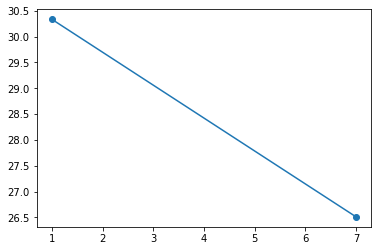

In [28]:
import matplotlib.pyplot as plt

x1 = np.linspace(1,7,2)
y1 = x * b1_model + b0_model


plt.scatter(x,y )
plt.plot(x,y)